<a href="https://colab.research.google.com/github/vlad-gby/ds_5_mini-projects/blob/main/03_AB-test/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B Test Significance Analysis
Scenario: A company ran an A/B test on their website to see if changing a button color (group B) increased the conversion rate compared to the old color (group A).

Your Task: Determine if the observed difference in conversion rates between group A and group B is statistically significant. You will do this by performing a permutation test:

Calculate the real difference in conversion rates between group A and B.

Combine the results of both groups into a single pool.

Repeatedly (e.g., 10,000 times) shuffle this pool and randomly re-assign users to a new "fake A" and "fake B" group of the same sizes.

Calculate the difference in conversion rates for each of these simulated permutations.

The p-value is the proportion of times the simulated difference was as extreme or more extreme than the real difference you observed in step 1.

In [2]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(seed=1234)

# Create random A/B data
data = pd.DataFrame(columns=['user_id', 'group', 'converted'])
data['user_id'] = rng.choice(range(10_000), size=5_000)
data['group'] = rng.choice(['A', 'B'], size= 5_000)
# Create converted datapoints, ensuring that B has more chance to convert over A (2/5 > 1/3)
data['converted'] = np.where(data['group'] == 'B', rng.choice([1, 1, 0, 0, 0], size=5000), rng.choice([1, 0, 0], size=5000))
# Find the difference between A&B. This is our synthetic benchmark
difference = data.loc[data['group'] == 'B', 'converted'].sum() - data[data['group'] == 'A'].loc[:, 'converted'].sum()

# In the for-loop we'll shuffle the data and find the difference in A vs B, and record it in shuffle_diff, in order to calculate the p_value later
shuffle_diff = []
for i in range(10_000):
    # Get shuffle data for the iteration
    shuffle_group = rng.permutation(np.array(data['group']))
    shuffle_conv = data['converted']
    # Record the difference between random A and B results
    As = shuffle_conv[shuffle_group == 'A'].sum()
    Bs = shuffle_conv[shuffle_group == 'B'].sum()
    shuffle_diff.append(Bs - As)

# Find the p_value, as a number of random cases that are more significant than our initial difference - over the number or records
p_value = (np.abs(np.array(shuffle_diff)) >= np.abs(difference)).sum() / len(shuffle_diff)

print(p_value)

0.0003


In most business cases, if the result is higher than 5% (0.05) - the finding can be treated statistically significant, and version B is preferable
In our case it's much lower than that, on my machine it's 0.003 (0.3%), meaning that our synthetic ratio (2/5 > 1/3) is more than valid

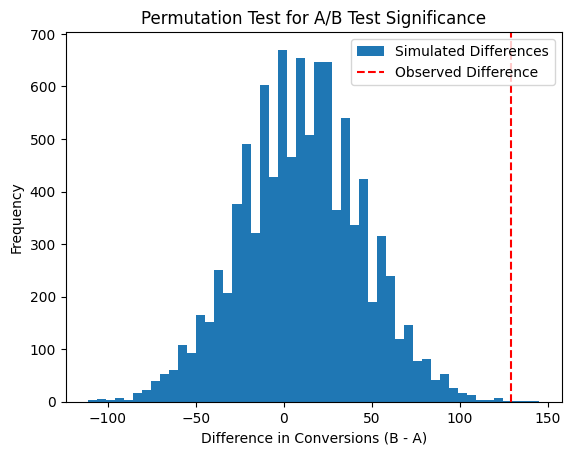

In [3]:
import matplotlib.pyplot as plt

plt.hist(shuffle_diff, bins=50, label='Simulated Differences')
plt.axvline(difference, color='r', linestyle='--', label='Observed Difference')
plt.xlabel("Difference in Conversions (B - A)")
plt.ylabel("Frequency")
plt.title("Permutation Test for A/B Test Significance")
plt.legend()
plt.show()